# 第４章

In [1]:
!wget https://nlp100.github.io/data/neko.txt

--2022-04-17 00:36:52--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.110.153, 185.199.109.153, 185.199.108.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘neko.txt.1’

neko.txt.1          100%[===================>] 952.92K  2.65MB/s    in 0.4s    

2022-04-17 00:36:53 (2.65 MB/s) - ‘neko.txt.1’ saved [975789/975789]



In [2]:
!mecab -o neko.txt.mecab neko.txt

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.family'] = 'Noto Sans JP'

## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ

In [4]:
sentences = []
morphs = []
with open('neko.txt.mecab', mode='r') as f:
  for l in f:
    if l != 'EOS\n':  # 文末以外：形態素解析情報を辞書型に格納して形態素リストに追加
      fields = l.split('\t')
      if len(fields) != 2 or fields[0] == '':  # 文頭以外の空白と改行文字はスキップ
        continue
      else:
        attr =  fields[1].split(',')
        morph = {'surface': fields[0], 'base': attr[6], 'pos': attr[0], 'pos1': attr[1]}
        morphs.append(morph)
    elif morphs != []:  # 文末ごとに文章の形態素リストが存在すればそれを登録
      sentences.append(morphs)
      morphs = []
sentences[1]

[{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
 {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'},
 {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
 {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'},
 {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'},
 {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'},
 {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]

## 31. 動詞
動詞の表層形をすべて抽出せよ．

In [5]:
ans = set()
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] == '動詞':
            ans.add(morph['surface'])
list(ans)[:10]

['兼ねる', '召し上がれ', '寄り', 'はっ', '見かね', '限ら', 'はらっ', '乱れ', 'ふざけ', 'まて']

## 32. 動詞の基本形
動詞の基本形をすべて抽出せよ．

In [6]:
ans = set()
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] == '動詞':
            ans.add(morph['base'])
list(ans)[:10]

['兼ねる', '逆らう', '飽く', '突き付ける', '詰める', '傾ける', '凹ます', 'のろける', '究める', '達する']

## 33. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [7]:
ans = set()
for sentence in sentences:
    for i in range(1, len(sentence)-1):
        if sentence[i-1]['pos'] == '名詞' and sentence[i]['surface'] == 'の' and sentence[i+1]['pos'] == '名詞':
            ans.add(sentence[i-1]['surface']+sentence[i]['surface']+sentence[i+1]['surface'])
list(ans)[:10]

['母堂のそれ',
 'はずの者',
 '魚の往生',
 '策の得',
 '息の穴',
 '袋の中',
 '英語のリードル',
 '列の中',
 '釜の底',
 '大名のよう']

## 34. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [8]:
ans = set()
for sentence in sentences:
    tmp = "" # 連続する名詞
    n = 0 # 名詞が連続する回数
    for morph in sentence:
        if morph['pos'] == '名詞':
            tmp += morph['surface']
            n += 1
        elif n > 1: # 名詞が2回以上登場したら登録
            ans.add(tmp)
            tmp = ""
            n = 0
        else: # 名詞が1回以下ならスキップ
            tmp = ""
            n = 0
    if n > 1:
        ans.add(tmp)
list(ans)[:10]

['何だい俳体詩', '庸人', '壊わし', 'それぎりかい', '嬢さま', '用事相談', '誰か路', '迷亭先生', '二三品', '大分人']

## 35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [9]:
dic = {}
for sentence in sentences:
    for morph in sentence:
        if morph['surface'] in dic.keys():
            dic[morph['surface']] += 1
        else:
            dic[morph['surface']] = 1
df = pd.DataFrame(dic.values(), index=dic.keys())
df.head()

,0
一,554
,411
吾輩,481
は,6420
猫,248


## 36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

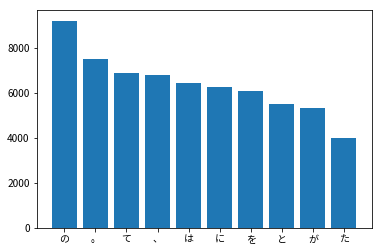

In [10]:
import numpy as np
import matplotlib.pyplot as plt
top10 = df.sort_values(by=0, ascending=False).head(10) 
plt.bar(top10.index, top10[0], tick_label=top10.index, align="center")
plt.show()

## 37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

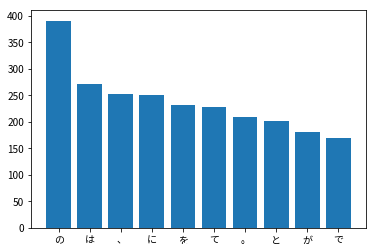

In [11]:
# 文章中に「猫」が含まれる文を対象に、単語の出現頻度を集計する
dic = {}
for sentence in sentences:
    if '猫' in [morph['surface'] for morph in sentence]:
        for morph in sentence:
            if morph['surface'] in dic.keys():
                dic[morph['surface']] += 1
            elif morph['surface'] != '猫':
                dic[morph['surface']] = 1
cat_df = pd.DataFrame(dic.values(), index=dic.keys())
top10 = cat_df.sort_values(by=0, ascending=False).head(10) 
plt.bar(top10.index, top10[0], tick_label=top10.index, align="center")
plt.show()

## 38. ヒストグラム
単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である

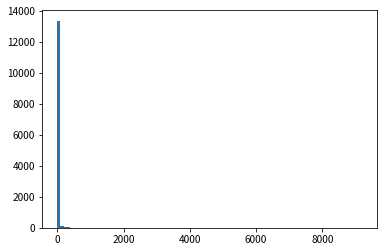

In [12]:
plt.hist(df[0], bins=100)
plt.show()

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

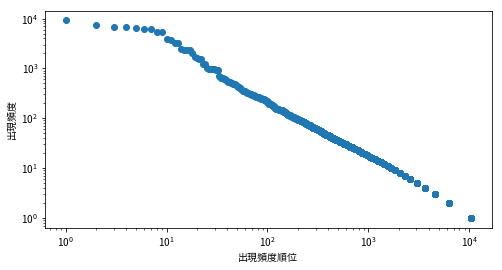

In [13]:
df['rank'] = df[0].rank(ascending=False)
plt.figure(figsize=(8, 4))
plt.scatter(df['rank'], df[0])
plt.xscale('log') # x軸をlogスケールで描く
plt.yscale('log') # y軸をlogスケールで描く
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')
plt.show()